# Summary

Repeat attempt at deriving Lagrangian correctly parameterized in terms of $v^x$ and $v^z$.

### Preliminaries

In [1]:
import sympy as sy, numpy as np, os
sy.init_printing(pretty_print=True,wrap_line=True)
from sympy import simplify, trigsimp, expand, factor, powsimp, \
    Eq, solve, solveset, sqrt, diff, Matrix, det, tan, cos, sin, sec, csc, \
    Abs, Rational, pi, re, im, atan, atan2, numer, denom, \
    lambdify, log, collect, cancel, integrate, Integral, \
    nroots, poly, N

from gmplib.utils import e2d
from gme.symbols import *
from gme.equations import Equations

from gmplib.plot_utils import GraphingBase


from functools import reduce

from scipy.optimize import root_scalar
from scipy.linalg import norm

# Won't work for eta<1
# rdotz = symbols('v^z',  real=True, positive=True)

In [2]:
# from notebook.services.config import ConfigManager
# cm = ConfigManager().update('notebook', {'limit_output': 20000})

In [3]:
import matplotlib as mpl, matplotlib.pyplot as plt
mpl.rc('font', size=14, family='Arial')
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib.ticker import MaxNLocator

gr = GraphingBase()
job_name = 'demo'

# Derivation of $p(v)$ and $L(v)$

## Basics

In [4]:
eta_ = Rational(3,2)
gmeq = Equations( eta=eta_,  mu=eta_/2, beta_type='sin', do_raw=True )

In [5]:
vx = symbols(r'x',  real=True)
vz = symbols(r'z',  real=True)

In [6]:
varphi_ = 1

## Manipulate metric tensor

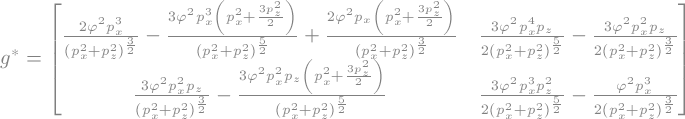

In [7]:
gstar_pxpz_eqn = gmeq.gstar_varphi_pxpz_eqn.subs({varphi_r:varphi})
gstar_pxpz_eqn

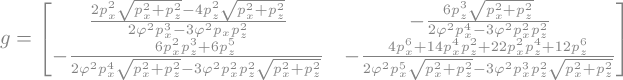

In [8]:
g_pxpz_eqn = Eq(g, gstar_pxpz_eqn.rhs.inv())
g_pxpz_eqn

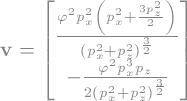

In [9]:
gmeq.rdot_vec_eqn.subs({eta:gmeq.eta, varphi_r:varphi})

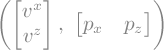

In [10]:
v_vec = Matrix([rdotx,rdotz])
p_covec = Matrix([px,pz]).T
v_vec,p_covec

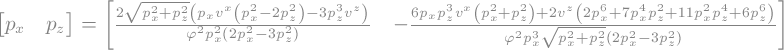

In [11]:
pcovec_eqn = Eq(p_covec, simplify(g_pxpz_eqn.rhs*v_vec).T)
pcovec_eqn

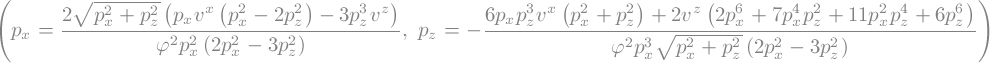

In [12]:
Eq(pcovec_eqn.lhs[0],pcovec_eqn.rhs[0]), Eq(pcovec_eqn.lhs[1],pcovec_eqn.rhs[1])

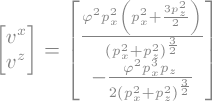

In [13]:
vvec_eqn = Eq(v_vec, simplify(p_covec*gstar_pxpz_eqn.rhs).T)
vvec_eqn

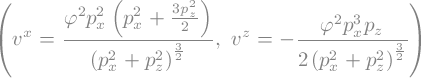

In [14]:
vx_px_pz_eqn = Eq(vvec_eqn.lhs[0],vvec_eqn.rhs[0])
vz_px_pz_eqn = Eq(vvec_eqn.lhs[1],vvec_eqn.rhs[1])
vx_px_pz_eqn, vz_px_pz_eqn

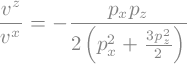

In [15]:
vzvx_ratio_eqn = Eq(vz_px_pz_eqn.lhs/vx_px_pz_eqn.lhs, vz_px_pz_eqn.rhs/vx_px_pz_eqn.rhs)
vzvx_ratio_eqn

## Expressions for $p_x(v^x,v^z)$ and $p_z(v^x,v^z)$ 

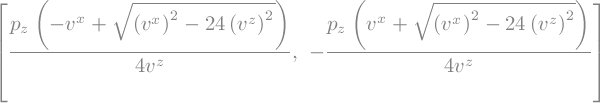

In [16]:
px_interim_solns = solve(vzvx_ratio_eqn,px)
px_interim_solns

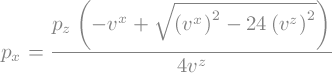

In [17]:
if gmeq.eta<1:
    px_interim_soln = px_interim_solns[0]
else:
    px_interim_soln = px_interim_solns[0]
px_interim_eqn = Eq(px, px_interim_soln)
if gmeq.eta<1:
    vx_,vz_ = 0.9,-0.2978
    px_,pz_ = 0.663,-1.35497
else:
#     vx_,vz_ = 1.0, 0.17
    vx_,vz_ = 1.05, 0.21
    vx_,vz_ = Rational(105,100), Rational(21,100)
    vx_,vz_ = 1.05462010732076, 0.214847320357639
    px_,pz_ = 1.15,-1.
#     px_,pz_ = 1.2366,-1.43112
px_interim_eqn

In [18]:
Eq(px, N(((px_interim_soln).subs({rdotx:vx_,rdotz:vz_}).subs({pz:pz_}))))

In [19]:
vx_px_pz_eqn.subs({px:px_,pz:pz_,varphi:1}), vz_px_pz_eqn.subs({px:px_,pz:pz_,varphi:1})

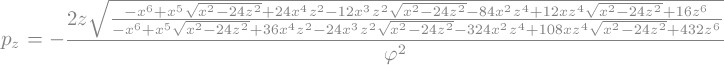

In [20]:
pzsqrd_vx_vz_eqn = Eq(pz**2, simplify( solve(vx_px_pz_eqn.subs(e2d(px_interim_eqn)), pz**2)[0] ))
pz_vx_vz_eqn = Eq(pz,sqrt(pzsqrd_vx_vz_eqn.rhs)
                  *(1 if gmeq.eta<1 else -1)).subs({Abs(rdotz):rdotz}) 
pz_vx_vz_eqn.subs({rdotx:vx,rdotz:vz})

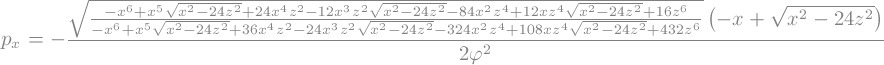

In [21]:
px_vx_vz_eqn = (px_interim_eqn.subs(e2d(pz_vx_vz_eqn)))
px_vx_vz_eqn.subs({rdotx:vx,rdotz:vz})

In [22]:
Eq(pz, N(((pz_vx_vz_eqn.rhs)
        .subs({rdotx:vx_,rdotz:vz_})
        .subs({varphi:1,px:px_,pz:pz_}))))

In [23]:
Eq(px, N(((px_vx_vz_eqn.rhs)
        .subs({rdotx:vx_,rdotz:vz_})
        .subs({varphi:1,px:px_,pz:pz_}))) )

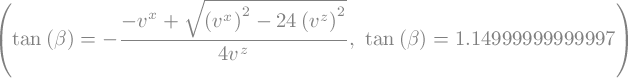

In [24]:
tanbeta_eqn = Eq(tan(beta), -px_vx_vz_eqn.rhs/pz_vx_vz_eqn.rhs)
tanbeta_eqn, N(tanbeta_eqn.subs({rdotx:vx_,rdotz:vz_}))

In [25]:
if gmeq.eta<1:
    px_vx_vz_lambda = lambda f,vx,vz:  \
        float((N(px_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
    pz_vx_vz_lambda = lambda f,vx,vz:  \
        float((N(pz_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
else:
    px_vx_vz_lambda = lambda f,vx,vz:  \
        float(re(N(px_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
    pz_vx_vz_lambda = lambda f,vx,vz:  \
        float(re(N(pz_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
p_vx_vz_lambda = lambda f,v: [px_vx_vz_lambda(f,v[0],v[1]),pz_vx_vz_lambda(f,v[0],v[1])]

## Lagrangian $L(v^x,v^z,\varphi)$ using $p(v)$ mappings and Legendre transform

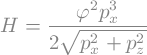

In [26]:
H_eqn = Eq(H, gmeq.H_eqn.rhs.subs({varphi_r:varphi, eta:gmeq.eta}))
H_eqn

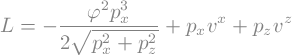

In [27]:
L_raw_eqn = simplify(Eq(L, px*rdotx + pz*rdotz - H_eqn.rhs))
L_raw_eqn

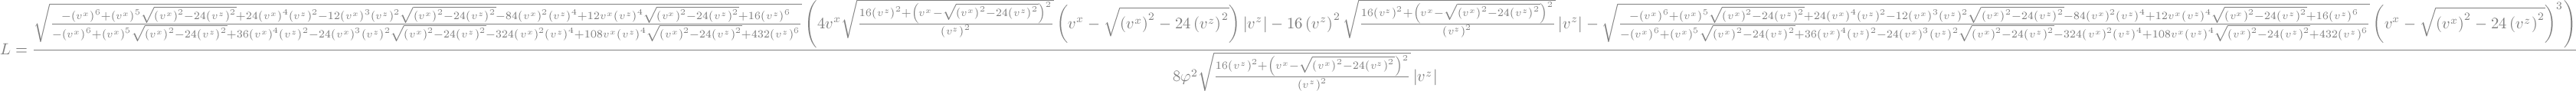

In [28]:
if gmeq.eta<1:
    L_interim_eqn = simplify( ((factor(L_raw_eqn.subs({px:-pz*tan(beta)}))).subs(e2d(tanbeta_eqn))
        .subs(e2d(px_vx_vz_eqn))).subs(e2d(pz_vx_vz_eqn)) )#.subs({rdotz:-Abs(rdotz)})
else:
    L_interim_eqn = simplify( ((factor(L_raw_eqn.subs({px:-pz*tan(beta)}))).subs(e2d(tanbeta_eqn))
        .subs(e2d(px_vx_vz_eqn))).subs(e2d(pz_vx_vz_eqn)) ).subs({rdotz:Abs(rdotz)})
L_interim_eqn

In [29]:
# L_interim_eqn = (L_prelim_eqn.subs(e2d(px_vx_vz_eqn)).subs(e2d(pz_vx_vz_eqn)))
# L_interim_eqn

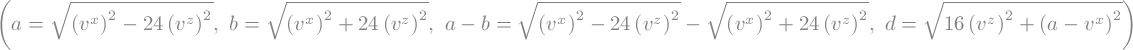

In [30]:
a = symbols(r'a',  real=True, positive=True)
b = symbols(r'b',  real=True, positive=True)
c = symbols(r'c',  real=True, positive=True)
d = symbols(r'd',  real=True, positive=True)
if gmeq.eta<1:
    a_subs_eqn = Eq(a, 
                    rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)+4*rdotz**2
                   )
    b_subs_eqn = Eq(b, 
                    rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)-4*rdotz**2
                   )
    c_subs_eqn = Eq(a-b, a_subs_eqn.rhs - b_subs_eqn.rhs)
    d_subs_eqn = Eq(d, 
                    rdotx-sqrt(rdotx**2-8*rdotz**2)
                   )
else:
    a_subs_eqn = Eq(a, 
                    sqrt(rdotx**2-24*rdotz**2)
                   )
    b_subs_eqn = Eq(b, 
                    sqrt(rdotx**2+24*rdotz**2)
                   )
    c_subs_eqn = Eq(a-b, a_subs_eqn.rhs - b_subs_eqn.rhs)
    d_subs_eqn = Eq(d, 
                    sqrt(16*rdotz**2+(a-rdotx)**2)
                   )
a_subs_eqn, b_subs_eqn, c_subs_eqn, d_subs_eqn

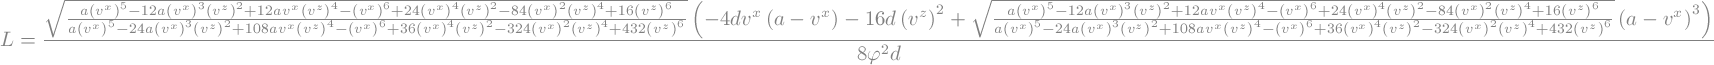

In [31]:
L_ab_eqn = Eq( L, simplify(simplify( (L_interim_eqn.rhs)
                                   .subs(e2d(a_subs_eqn,do_flip=True)).subs(e2d(b_subs_eqn,do_flip=True)) )
                          .subs(e2d(c_subs_eqn,do_flip=False)).subs(e2d(d_subs_eqn,do_flip=True))) )
# L_ab_eqn = Eq( L, simplify(L_ab_eqn.rhs.subs({Abs(rdotz):-rdotz})))
L_ab_eqn

In [32]:
# L_ab_eqn.subs({sqrt((16*rdotz**2+(rdotx-sqrt(rdotx**2-8*rdotz**2)**2))/rdotz**2):})

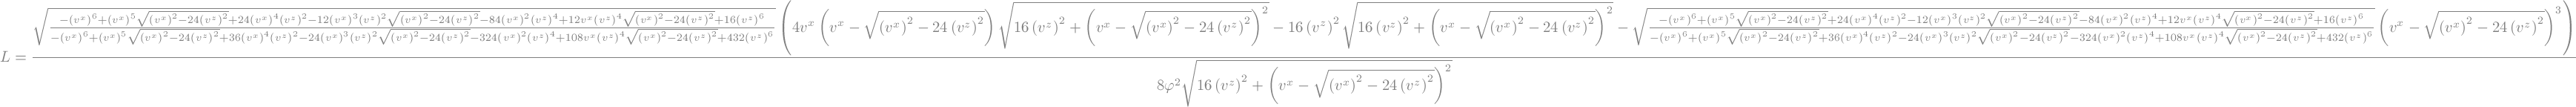

In [33]:
if gmeq.eta<1:
    L_manipulated_eqn = factor(((
        L_ab_eqn.subs(e2d(a_subs_eqn,do_flip=False))
                .subs(e2d(b_subs_eqn,do_flip=False))
                .subs(e2d(d_subs_eqn,do_flip=False))
    )))
    L_manipulated_eqn = ( L_manipulated_eqn.subs({Abs(rdotz):-rdotz}) )
else:
    L_manipulated_eqn = (((
        L_ab_eqn.subs(e2d(d_subs_eqn,do_flip=False))
                .subs(e2d(a_subs_eqn,do_flip=False))
                .subs(e2d(b_subs_eqn,do_flip=False))
    )))
    L_manipulated_eqn = simplify( L_manipulated_eqn.subs({Abs(rdotz):rdotz}) )
#     L_eqn = simplify( L_interim_eqn.subs({Abs(rdotz):rdotz}) )
L_manipulated_eqn

## Lagrangian $L$ in compact form

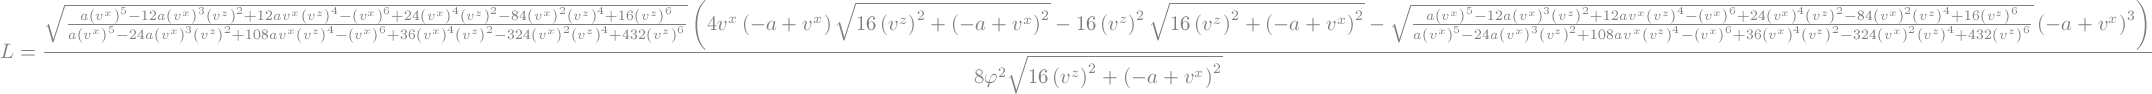

In [34]:
if gmeq.eta<1:
    a_subs_eqn = Eq(a, sqrt(rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)-4*rdotz**2))
    b_subs_eqn = Eq(b, sqrt(rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)+4*rdotz**2))
    b2_subs_eqn = Eq(b*sqrt(2), sqrt(2*rdotx**2-2*rdotx*sqrt(rdotx**2-8*rdotz**2)+8*rdotz**2))
    c_subs_eqn = Eq(c, sqrt(rdotx**2-8*rdotz**2))
    c2_subs_eqn = Eq(c*sqrt(2), sqrt(2*rdotx**2-16*rdotz**2))
    L_temp_eqn = simplify(L_manipulated_eqn
                     .subs(e2d(a_subs_eqn,do_flip=True))
                     .subs(e2d(b_subs_eqn,do_flip=True))
                     .subs(e2d(b2_subs_eqn,do_flip=True))
#                      .subs(e2d(c_subs_eqn,do_flip=True)) 
                    ).subs(e2d(c_subs_eqn,do_flip=True)).subs(e2d(c2_subs_eqn,do_flip=True))
else:
    a_subs_eqn = Eq(a, sqrt(rdotx**2-24*rdotz**2) )
    b_subs_eqn = Eq(b, sqrt(rdotx**2+24*rdotz**2) )
#     b2_subs_eqn = Eq(b*sqrt(2), sqrt(2*rdotx**2-2*rdotx*sqrt(rdotx**2-8*rdotz**2)+8*rdotz**2))
    c_subs_eqn = Eq(c, sqrt(16*rdotz**2+(a-rdotx)**2) )
    L_temp_eqn = (L_manipulated_eqn
                     .subs(e2d(a_subs_eqn,do_flip=True))
                     .subs(e2d(b_subs_eqn,do_flip=True))
#                      .subs(e2d(b2_subs_eqn,do_flip=True))
                     .subs(e2d(c_subs_eqn,do_flip=True)) 
                    )
L_temp_eqn

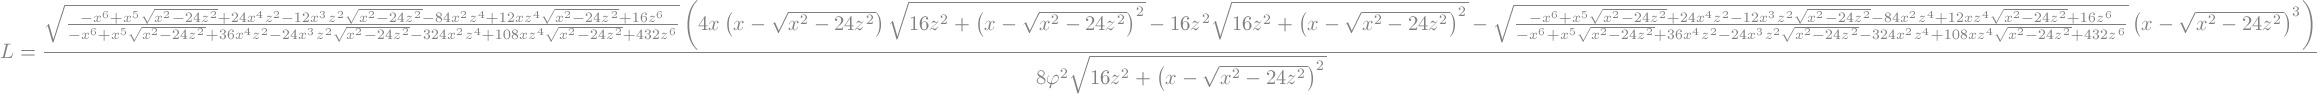

In [35]:
L_compact_eqn = (L_temp_eqn
                   .subs(e2d(c_subs_eqn,do_flip=False))
                   .subs(e2d(b_subs_eqn,do_flip=False))
                   .subs(e2d(a_subs_eqn,do_flip=False)) )
(L_compact_eqn.subs({rdotx:vx,rdotz:vz}))

In [36]:
px_,pz_,vx_,vz_ 

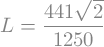

In [37]:
L_compact_eqn.subs({rdotx:(Rational(9,10) if gmeq.eta<1 else Rational(105,100)),
                    rdotz:(Rational(3,10) if gmeq.eta<1 else Rational(21,100)),varphi:varphi_})

In [38]:
# L_lambda = lambda f,vx,vz: float(re(N(L_decompact_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
# L_lambda = lambda f_,vx_,vz_: float(re(N(L_interim_eqn.rhs.subs({varphi:f_,rdotx:vx_,rdotz:vz_}))))
L_raw_lambda = lambda f_,px_,pz_,vx_,vz_: \
                    float((N(L_raw_eqn.rhs.subs({varphi:f_,px:px_,pz:pz_,rdotx:vx_,rdotz:vz_}))))
# L_lambda = lambda f_,vx_,vz_: float((N(L_interim_eqn.rhs.subs({varphi:f_,rdotx:vx_,rdotz:vz_}))))
L_lambda = lambda f_,vx_,vz_: float((N(L_compact_eqn.rhs.subs({varphi:f_,rdotx:vx_,rdotz:vz_}))))

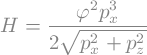

In [39]:
H_eqn

In [40]:
H_lambdified = lambdify([varphi,px,pz],H_eqn.rhs)
H_lambda = lambda f_,px_,pz_: float(N(H_lambdified(f_,px_,pz_)))

## Rederivation of metric tensor $g$ from $L$

In [41]:
sub_ = {rdotx:vx_, rdotz:vz_, px:px_,pz:pz_, varphi:varphi_}
sub_

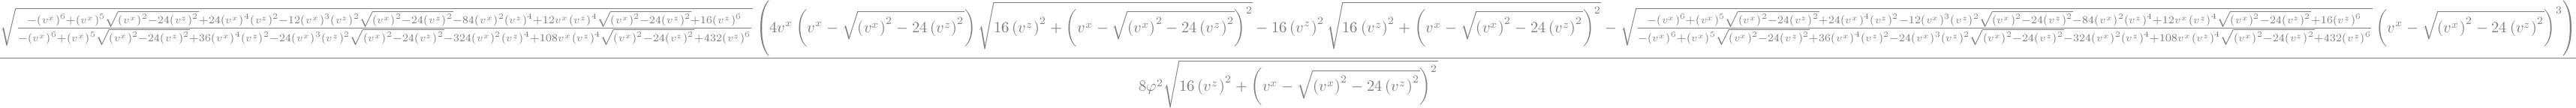

In [43]:
L_ = L_compact_eqn.rhs
L_

In [95]:
dLdv = Matrix([ diff(L_,rdotx), diff(L_,rdotz) ]) 
d2Ldvxdvx = diff(dLdv[0],rdotx)
d2Ldvxdvz = diff(dLdv[0],rdotz)
d2Ldvzdvx = diff(dLdv[1],rdotx)
d2Ldvzdvz = diff(dLdv[1],rdotz)
d2Ldv2 = (Matrix([[d2Ldvxdvx,d2Ldvxdvz],[d2Ldvzdvx,d2Ldvzdvz]]))
g_from_L_eqn = Eq(g, d2Ldv2)

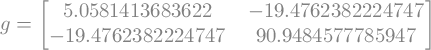

In [96]:
g_p_ = g_pxpz_eqn.subs(sub_)
g_p_

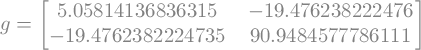

In [97]:
g_v_ = Eq(g, N(g_from_L_eqn.rhs.subs(sub_)))
g_v_

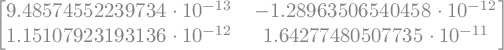

In [98]:
g_v_.rhs - g_p_.rhs

In [83]:
px_alt_, pz_alt_ = 0.7, -1
vx_alt_ = vx_px_pz_eqn.rhs.subs({px:px_alt_,pz:pz_alt_,varphi:varphi_})
vz_alt_ = vz_px_pz_eqn.rhs.subs({px:px_alt_,pz:pz_alt_,varphi:varphi_})
vx_alt_,vz_alt_
sub_alt_ = {rdotx:vx_alt_, rdotz:vz_alt_, px:px_alt_,pz:pz_alt_, varphi:varphi_}
sub_alt_

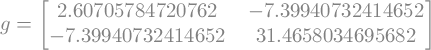

In [84]:
g_p_ = g_pxpz_eqn.subs(sub_alt_)
g_p_

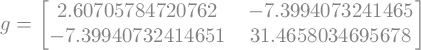

In [85]:
g_v_ = Eq(g, N(g_from_L_eqn.rhs.subs(sub_alt_)))
g_v_

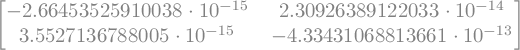

In [86]:
g_v_.rhs - g_p_.rhs

# Local tests

In [50]:
# vx_, vz_ = 0.9, -0.2978
# vx_, vz_

In [51]:
N(px_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_,varphi:varphi_})), \
N(pz_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_,varphi:varphi_}))

In [52]:
px_ = N(px_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_}).subs({varphi:varphi_}))
pz_ = N(pz_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_}).subs({varphi:varphi_}))
px_, pz_

In [53]:
px_ = px_vx_vz_lambda(varphi_,vx_,vz_)
pz_ = pz_vx_vz_lambda(varphi_,vx_,vz_)
px_, pz_

In [54]:
Matrix([px_,pz_]).dot(Matrix([vx_,vz_]))

In [55]:
sub_ = {rdotx:vx_,rdotz:vz_,varphi:varphi_, px:px_, pz:pz_}

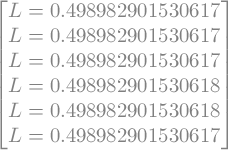

In [56]:
Matrix([
    N(L_raw_eqn.subs(sub_)), 
    Eq(L,L_raw_lambda(varphi_,px_,pz_,vx_,vz_)),
    N(L_interim_eqn.subs(sub_)), 
    N(L_manipulated_eqn.subs(sub_)), 
    N(L_compact_eqn.subs(sub_)), 
    Eq(L,L_lambda(varphi_,vx_,vz_))
])

# Indicatrix/figuratrix tests

In [57]:
if gmeq.eta<1:
    varphi_plot_ = 1
else:
    varphi_plot_ = 1

In [58]:
sub_plot_ = {varphi_r:varphi_plot_, eta:gmeq.eta}

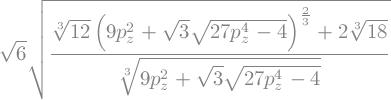

In [59]:
H_parametric_eqn = Eq((2*gmeq.H_eqn.rhs)**2,1).subs(sub_plot_)
px_H_solns = [simplify(sqrt(soln)) for soln in solve( H_parametric_eqn ,px**2)]
pz_H_solns = [simplify(sqrt(soln)).subs({Abs(px):px}) for soln in solve( H_parametric_eqn ,pz**2)]
px_H_soln_ = [soln for soln in px_H_solns if Abs(sy.im(N(soln.subs({pz:1}))))<1e-10][0]
px_H_lambda = lambdify( [pz], simplify(px_H_soln_) )
numer(simplify(px_H_soln_))

In [60]:
pz_min_eqn = Eq(pz_min, 0)
px_min_eqn = Eq(px_min, 
                sqrt(solve(Eq((
                solve(Eq(4*gmeq.H_eqn.rhs**2,1).subs(sub_plot_),pz**2)[:])[0],0)
                               ,px**2)[1]))
tanbeta_max_eqn = Eq(tan(beta_max),sy.oo)
tanbeta_max = None
px_min_ = round(float(N(px_min_eqn.rhs.subs(sub_plot_))),4)
pz_min_ = round(float(N(pz_min_eqn.rhs.subs(sub_plot_))),8)
px_min_, -pz_min_, np.rad2deg(np.arctan(px_min_/pz_min_)) if pz_min_>0 else None

(0.0, -0.0, None)

In [61]:
v_from_gstar_lambda_tmp = lambdify((px,pz),
                N(gmeq.gstar_varphi_pxpz_eqn.subs(sub_plot_).rhs*Matrix([px,pz])))
v_from_gstar_lambda = lambda px_,pz_: (v_from_gstar_lambda_tmp(px_,pz_)).flatten()
v_lambda = lambda pa: np.array([(v_from_gstar_lambda(px_,pz_)) for px_,pz_ in pa])
# gmeq.gstar_varphi_pxpz_eqn

In [62]:
if gmeq.eta==Rational(3,2):
    pz_max_ = 100
else:
    pz_max_ = 50
pz_array = -10**np.linspace(np.log10(pz_min_ if pz_min_>0 else 1e-1), np.log10(pz_max_), 50)
px_array = px_H_lambda(pz_array)
p_array = np.vstack([px_array,pz_array]).T
p_array = p_array[np.isfinite(p_array[:,0]) & np.isfinite(p_array[:,1])]

modp_array = norm(p_array,axis=0)
tanbeta_crit = float(N(gmeq.tanbeta_crit_eqn.rhs.subs({eta:gmeq.eta})))

p_infc_array = p_array[np.abs(p_array[:,0]/p_array[:,1])<tanbeta_crit]
p_supc_array = p_array[np.abs(p_array[:,0]/p_array[:,1])>=tanbeta_crit]

v_infc_array = v_lambda(p_infc_array)
v_supc_array = v_lambda(p_supc_array)
v_array = v_lambda(p_array)
# v_array

In [63]:
p_from_v_array = np.array([p_vx_vz_lambda(varphi_plot_,v_) for v_ in v_array[::1]])
len(p_from_v_array), len(p_array)

In [64]:
p_from_v_trunc_raw_array = p_from_v_array[np.isfinite((p_from_v_array[:,0])) 
                                          & np.isfinite((p_from_v_array[:,1]))]
v_from_v_trunc_raw_array = v_array[np.isfinite((p_from_v_array[:,0])) 
                                   & np.isfinite((p_from_v_array[:,1]))]
len(p_from_v_trunc_raw_array), len(v_from_v_trunc_raw_array)

In [65]:
p_trunc1_array = p_from_v_trunc_raw_array[1:]
p_trunc0_array = p_from_v_trunc_raw_array[:-1]
p_trunc1_array-p_trunc0_array
p_from_v_trunc_array = p_trunc0_array[(p_trunc1_array[:,1]-p_trunc0_array[:,1])<0]
v_trunc0_array = v_from_v_trunc_raw_array[:-1]
v_from_v_trunc_array = v_trunc0_array[(p_trunc1_array[:,1]-p_trunc0_array[:,1])<0]

In [66]:
p_from_v_infc_array = p_from_v_trunc_array[np.abs(p_from_v_trunc_array[:,0]
                                            /p_from_v_trunc_array[:,1])<tanbeta_crit]
p_from_v_supc_array = p_from_v_trunc_array[np.abs(p_from_v_trunc_array[:,0]
                                            /p_from_v_trunc_array[:,1])>=tanbeta_crit]

In [67]:
[np.round(np.dot(p_,v_),3) for p_,v_ in (zip(p_from_v_infc_array,v_infc_array))]

In [68]:
[np.round(np.dot(p_,v_),3) for p_,v_ in (zip(p_infc_array,v_infc_array))]

In [69]:
[round(p_[0]*v_[0]+p_[1]*v_[1],3) for p_,v_ in (zip(p_infc_array,v_infc_array))]

In [70]:
[np.round(H_lambda(varphi_plot_, px_,pz_),4) for px_,pz_ in p_from_v_infc_array]

In [71]:
[np.round(H_lambda(varphi_plot_, px_,pz_),4) for px_,pz_ in p_infc_array]

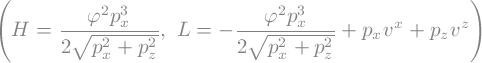

In [72]:
H_eqn, L_raw_eqn

In [73]:
[round(H_eqn.rhs.subs({varphi:varphi_plot_,px:px_,pz:pz_}),2) 
         for [px_,pz_],[vx_,vz] in zip(p_infc_array,v_infc_array)]

In [74]:
[round((px*rdotx+pz*rdotz).subs({px:p_[0],pz:p_[1],rdotx:v_[0],rdotz:v_[1]}),3) 
         for (p_,v_) in zip(p_infc_array,v_infc_array)]

In [75]:
[np.round(L_raw_lambda(varphi_plot_, *p_,*v_),4) 
         for (p_,v_) in zip(p_infc_array,v_infc_array)]

In [76]:
# [np.round(L_lambda(varphi_, *v_),4) for v_ in v_infc_array]

# Plot

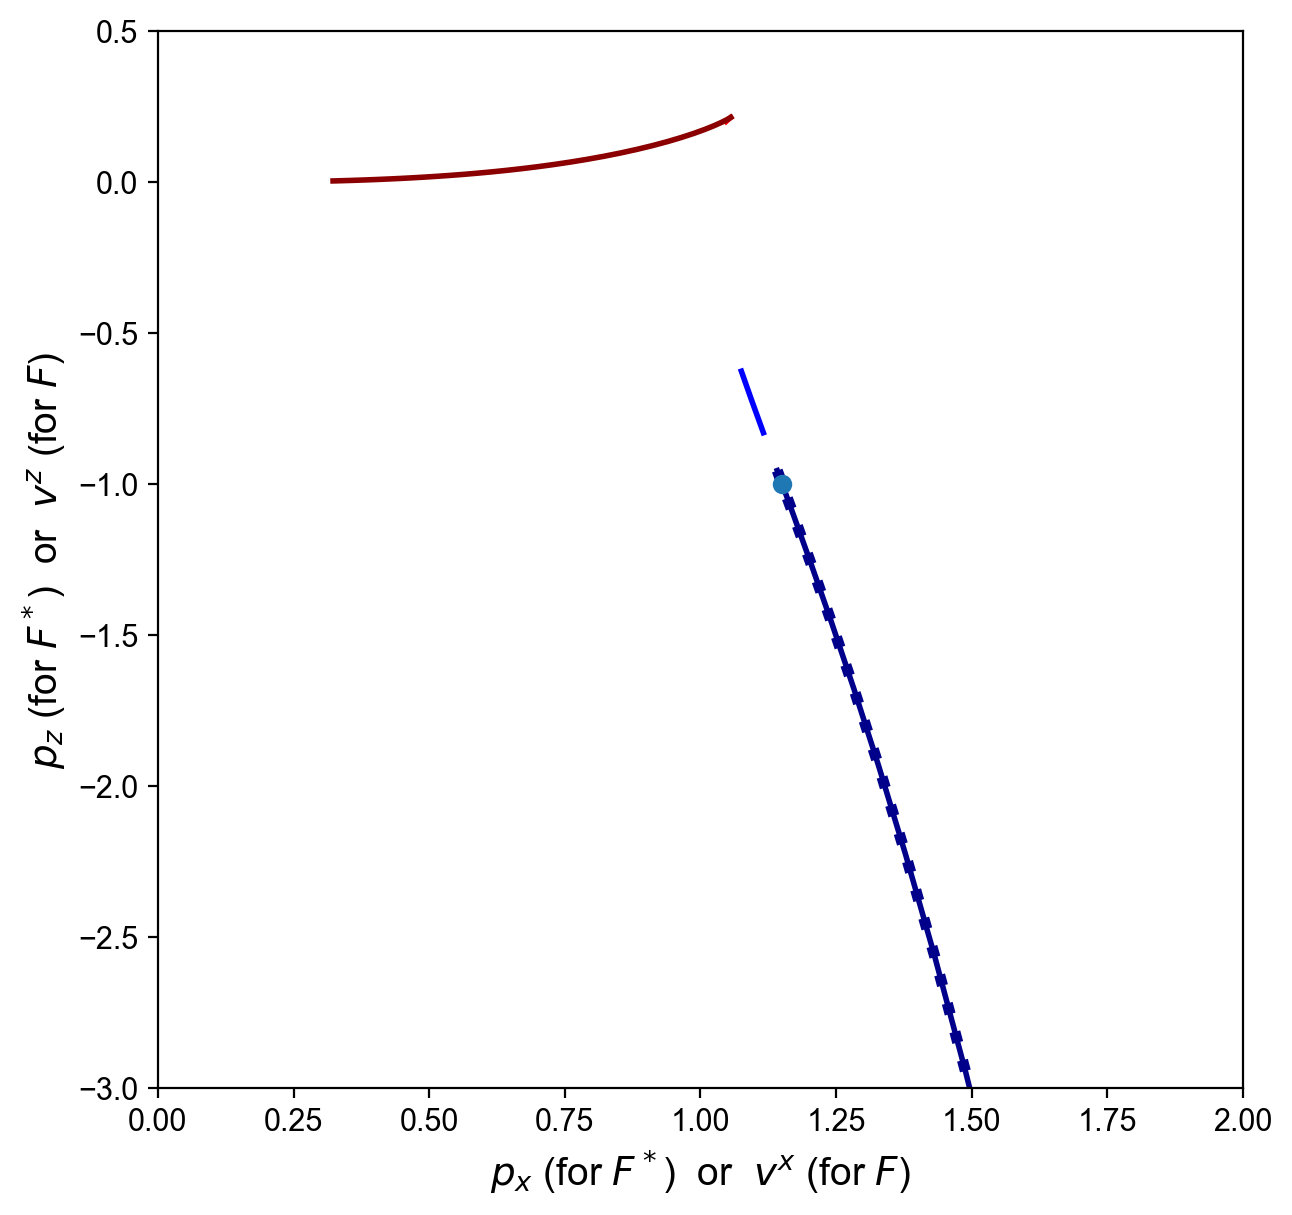

In [77]:
fig = gr.create_figure(job_name+'_Fstar_F_rectlinear', fig_size=(7,7))
plt.plot(p_supc_array[:,0],p_supc_array[:,1], 'Blue', lw=2, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta\geq\beta_\mathrm{c}$')
plt.plot(p_infc_array[:,0],p_infc_array[:,1], 'DarkBlue', lw=2, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta<\beta_\mathrm{c}$')

plt.plot(p_from_v_supc_array[:,0],p_from_v_supc_array[:,1], 'Blue', lw=4, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta\geq\beta_\mathrm{c}$')
plt.plot(p_from_v_infc_array[:,0],p_from_v_infc_array[:,1], 'DarkBlue', lw=4, ls=':', 
         label=r'$F^*\!\!=1$,  $\beta<\beta_\mathrm{c}$')

plt.plot(v_supc_array[:,0],v_supc_array[:,1], 'Red', lw=2, ls='-', 
         label=r'$F=1$,  $\beta\geq\beta_\mathrm{c}$')
# plt.plot([0,vx_abcrit_],[0,vz_abcrit_], 
#          '-.', color='DarkRed', lw=1, label=r'$\alpha_{\mathrm{c}}$')
plt.plot(v_infc_array[:,0],v_infc_array[:,1], 'DarkRed', lw=2, 
         ls='-', 
         label=r'$F=1$,  $\beta<\beta_\mathrm{c}$')
plt.xlabel(r'$p_x$ (for $F^*$)  or  $v^x$ (for $F$)', fontsize=14)
plt.ylabel(r'$p_z$ (for $F^*$)  or  $v^z$ (for $F$)', fontsize=14)
plt.xlim(0,2)
plt.ylim(-3,0.5);
plt.plot(px_,pz_,'o')
px_,pz_

In [78]:
gmeq.eta